In [1]:
from fastai.vision.widgets import *
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

<Axes: >

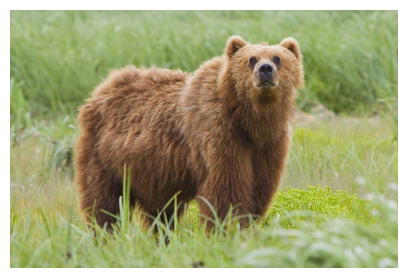

In [3]:
from io import BytesIO

# Handle both tuple and dict versions safely
upload_value = btn_upload.value

if isinstance(upload_value, dict):  # Newer ipywidgets
    file_content = list(upload_value.values())[0]['content']
elif isinstance(upload_value, tuple):  # Older ipywidgets
    file_content = upload_value[0]['content']
else:
    raise TypeError("Unexpected upload value type:", type(upload_value))

img = PILImage.create(BytesIO(file_content))
img.show()

In [4]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [5]:
import pathlib
import platform

# Fix cross-platform path issue
if platform.system() == 'Windows':
    pathlib.PosixPath = pathlib.WindowsPath

from fastai.learner import load_learner

learn_inf = load_learner('export.pkl')

C:\Users\Rehmah Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [6]:
pred,pred_idx,probs = learn_inf.predict(img)

In [7]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9999')

In [8]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [9]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [10]:
VBox([
    widgets.Label('Select your bear!'),
    btn_upload,
    btn_run,
    out_pl,
    lbl_pred
])
